### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-15,121.410004,124.000000,120.419998,123.989998,123.257416,92403800
1,2021-03-16,125.699997,127.220001,124.720001,125.570000,124.828079,115227900
2,2021-03-17,124.050003,125.860001,122.339996,124.760002,124.022865,111932600
3,2021-03-18,122.879997,123.180000,120.320000,120.529999,119.817863,121229700
4,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.281052,185549500


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-03-08,158.820007,162.880005,155.800003,157.440002,157.440002,131148300
249,2022-03-09,161.479996,163.410004,159.410004,162.949997,162.949997,91454900
250,2022-03-10,160.199997,160.389999,155.979996,158.520004,158.520004,105342000
251,2022-03-11,158.929993,159.279999,154.500000,154.729996,154.729996,96836300
252,2022-03-11,158.929993,159.279907,154.500000,154.729996,154.729996,96970102


In [11]:
df1=df.reset_index()['Close']

In [12]:
df1

0      123.989998
1      125.570000
2      124.760002
3      120.529999
4      119.989998
          ...    
248    157.440002
249    162.949997
250    158.520004
251    154.729996
252    154.729996
Name: Close, Length: 253, dtype: float64

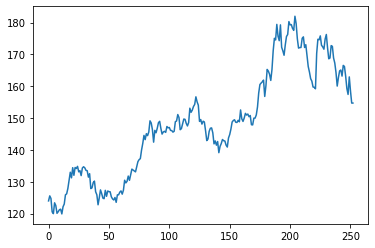

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [77]:
df2=df
df2=df2.drop(["Open","High","Low","Adj Close","Volume"],axis=1)


,Date,Close
0,2021-03-15,123.989998
2,2021-03-17,124.760002
3,2021-03-18,120.529999
4,2021-03-19,119.989998
5,2021-03-22,123.389999
...,...,...
248,2022-03-08,157.440002
249,2022-03-09,162.949997
250,2022-03-10,158.520004
251,2022-03-11,154.729996


In [79]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y%m%d',errors='ignore')
df2

,Date,Close
0,2021-03-15,123.989998
2,2021-03-17,124.760002
3,2021-03-18,120.529999
4,2021-03-19,119.989998
5,2021-03-22,123.389999
...,...,...
248,2022-03-08,157.440002
249,2022-03-09,162.949997
250,2022-03-10,158.520004
251,2022-03-11,154.729996


In [83]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

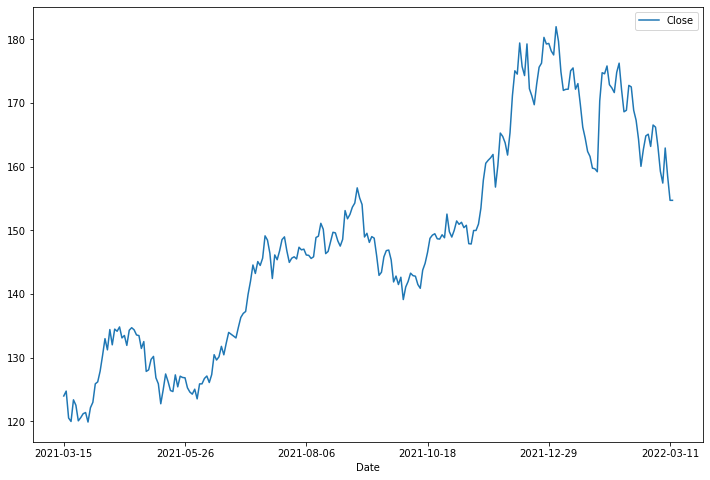

In [88]:
df2.plot(figsize=(12,8))

In [90]:
df1

array([[0.06585085],
       [0.09128963],
       [0.07824828],
       [0.01014325],
       [0.00144898],
       [0.05619059],
       [0.04250522],
       [0.00305899],
       [0.01110923],
       [0.02109157],
       [0.02398965],
       [0.        ],
       [0.03622605],
       [0.04991142],
       [0.09660281],
       [0.10159391],
       [0.12880375],
       [0.16841089],
       [0.21091611],
       [0.18257936],
       [0.23393967],
       [0.19529864],
       [0.23506681],
       [0.22959272],
       [0.24054091],
       [0.21268718],
       [0.21896634],
       [0.19384964],
       [0.23216884],
       [0.23860893],
       [0.23329574],
       [0.22025441],
       [0.21864427],
       [0.1861215 ],
       [0.20350978],
       [0.12799866],
       [0.13202391],
       [0.15842866],
       [0.16599591],
       [0.11189819],
       [0.09676385],
       [0.04620826],
       [0.08162936],
       [0.12155846],
       [0.10255991],
       [0.07969726],
       [0.07712125],
       [0.119

In [14]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [15]:
import numpy as np

In [16]:
df1

0      123.989998
1      125.570000
2      124.760002
3      120.529999
4      119.989998
          ...    
248    157.440002
249    162.949997
250    158.520004
251    154.729996
252    154.729996
Name: Close, Length: 253, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
print(df1)

[[0.06585085]
 [0.09128963]
 [0.07824828]
 [0.01014325]
 [0.00144898]
 [0.05619059]
 [0.04250522]
 [0.00305899]
 [0.01110923]
 [0.02109157]
 [0.02398965]
 [0.        ]
 [0.03622605]
 [0.04991142]
 [0.09660281]
 [0.10159391]
 [0.12880375]
 [0.16841089]
 [0.21091611]
 [0.18257936]
 [0.23393967]
 [0.19529864]
 [0.23506681]
 [0.22959272]
 [0.24054091]
 [0.21268718]
 [0.21896634]
 [0.19384964]
 [0.23216884]
 [0.23860893]
 [0.23329574]
 [0.22025441]
 [0.21864427]
 [0.1861215 ]
 [0.20350978]
 [0.12799866]
 [0.13202391]
 [0.15842866]
 [0.16599591]
 [0.11189819]
 [0.09676385]
 [0.04620826]
 [0.08162936]
 [0.12155846]
 [0.10255991]
 [0.07969726]
 [0.07712125]
 [0.11930441]
 [0.08903556]
 [0.11592331]
 [0.11270328]
 [0.11189819]
 [0.08662047]
 [0.07583319]
 [0.07052   ]
 [0.08307835]
 [0.05860569]
 [0.09644176]
 [0.09660281]
 [0.11012714]
 [0.11640631]
 [0.09998389]
 [0.11994843]
 [0.17034286]
 [0.15681852]
 [0.16502968]
 [0.19143443]
 [0.17002103]
 [0.19964583]
 [0.2266945 ]
 [0.22218639]
 [0.21

In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(177, 76)

In [22]:
train_data

array([[0.06585085],
       [0.09128963],
       [0.07824828],
       [0.01014325],
       [0.00144898],
       [0.05619059],
       [0.04250522],
       [0.00305899],
       [0.01110923],
       [0.02109157],
       [0.02398965],
       [0.        ],
       [0.03622605],
       [0.04991142],
       [0.09660281],
       [0.10159391],
       [0.12880375],
       [0.16841089],
       [0.21091611],
       [0.18257936],
       [0.23393967],
       [0.19529864],
       [0.23506681],
       [0.22959272],
       [0.24054091],
       [0.21268718],
       [0.21896634],
       [0.19384964],
       [0.23216884],
       [0.23860893],
       [0.23329574],
       [0.22025441],
       [0.21864427],
       [0.1861215 ],
       [0.20350978],
       [0.12799866],
       [0.13202391],
       [0.15842866],
       [0.16599591],
       [0.11189819],
       [0.09676385],
       [0.04620826],
       [0.08162936],
       [0.12155846],
       [0.10255991],
       [0.07969726],
       [0.07712125],
       [0.119

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 25
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(151, 25)
(151,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(50, 25)
(50,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(25,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 25, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 25, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 4s 449ms/step - loss: 0.1305 - val_loss: 0.2990
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0466 - val_loss: 0.0203
Epoch 3/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0155 - val_loss: 0.0318
Epoch 4/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0196 - val_loss: 0.0205
Epoch 5/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0081 - val_loss: 0.0705
Epoch 6/100
3/3 [==============================] - 0s 42ms/step - loss: 0.0139 - val_loss: 0.0797
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0128 - val_loss: 0.0454
Epoch 8/100
3/3 [==============================] - 0s 64ms/step - loss: 0.0080 - val_loss: 0.0162
Epoch 9/100
3/3 [==============================] - 0s 79ms/step - loss: 0.0087 - val_loss: 0.0104
Epoch 10/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0098 - val_loss: 0.0144
Epoch 11/100
3/3 [

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.8.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [91]:
train_predict.shape

(151, 1)

In [92]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.07302538234993

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

166.12840354154233

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (50,1) into shape (0,1)

In [43]:
len(test_data)

76

In [45]:
x_input=test_data[51:].reshape(1,-1)
x_input.shape


(1, 25)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.8333602935682183,
 0.8843987472354085,
 0.9077443785897705,
 0.8407663642789329,
 0.7847367975069643,
 0.788601006604525,
 0.8515536461258335,
 0.847689694635773,
 0.788601006604525,
 0.7631622338131641,
 0.7151829014052538,
 0.6467559093107609,
 0.6897441286138928,
 0.7237161337306863,
 0.7280630831821215,
 0.6971502154250764,
 0.7512478064520149,
 0.745934619570799,
 0.6966672174637016,
 0.6343584839882366,
 0.604411596053472,
 0.6931250982430475,
 0.6218001344807751,
 0.5607792291974658,
 0.5607792291974658]

In [58]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=25
i=0
while(i<5):
    
    if(len(temp_input)>25):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.56857085 0.56506705 0.56211936 0.55977386 0.5581075  0.5568738
 0.55611283 0.55588514 0.55569202 0.55554783 0.55556118 0.55586392
 0.55606455 0.55638725 0.55699015 0.55790514 0.55898541 0.55972689
 0.56076533 0.56206465 0.56337827 0.56446695 0.56560558 0.56678331
 0.56798357]
0 day output [[0.56919026]]
1 day input [0.56506705 0.56211936 0.55977386 0.5581075  0.5568738  0.55611283
 0.55588514 0.55569202 0.55554783 0.55556118 0.55586392 0.55606455
 0.55638725 0.55699015 0.55790514 0.55898541 0.55972689 0.56076533
 0.56206465 0.56337827 0.56446695 0.56560558 0.56678331 0.56798357
 0.56919026]
1 day output [[0.5703906]]
2 day input [0.56211936 0.55977386 0.5581075  0.5568738  0.55611283 0.55588514
 0.55569202 0.55554783 0.55556118 0.55586392 0.55606455 0.55638725
 0.55699015 0.55790514 0.55898541 0.55972689 0.56076533 0.56206465
 0.56337827 0.56446695 0.56560558 0.56678331 0.56798357 0.56919026
 0.57039058]
2 day output [[0.5715755]]
3 day input [0.55977386 0.5581075  0.556

In [59]:
day_new=np.arange(1,26)
day_pred=np.arange(26,31)

In [60]:
import matplotlib.pyplot as plt

In [61]:
len(df1)

253

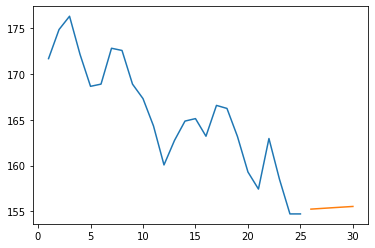

In [62]:
plt.plot(day_new,scaler.inverse_transform(df1[228:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [66]:
otp=scaler.inverse_transform(lst_output)
otp

array([[155.2524053 ],
       [155.32695706],
       [155.4005537 ],
       [155.47287313],
       [155.54365621]])

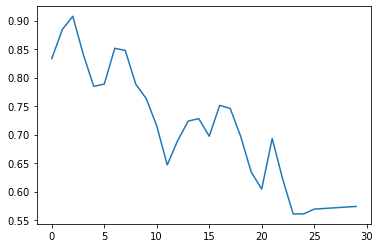

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[228:])

In [64]:
df3=scaler.inverse_transform(df3).tolist()

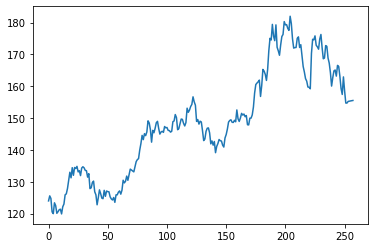

In [65]:
plt.plot(df3)